In [7]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.style.use('ggplot')

In [12]:
dim = 3
nump = 100
nums = 4096
dt = 0.0125
zeta = 0.5
m = 0.5
kBT = 0.5
std = np.sqrt(2*kBT*zeta*dt)
np.random.seed(0)
R = np.zeros([dim,nump]) # array to store current position
V = np.zeros([dim,nump]) # array to store current velocity
W = np.zeros([dim,nump]) # array to store current random forces
Rs = np.zeros([dim,nump,nums]) # array to store positions
Vs = np.zeros([dim,nump,nums]) # array to store velocities
Ws = np.zeros([dim,nump,nums]) # array to store random  forces
time = np.zeros([nums]) # array to store all time steps

In [13]:
for i in range(nums):
    W = std*np.random.randn(dim,nump)
    R, V = R + V*dt, (V*(1-zeta/m*dt))+(W/m)
    Rs[:,:,i]=R
    Vs[:,:,i]=V
    Ws[:,:,i]=W
    time[i] =i*dt

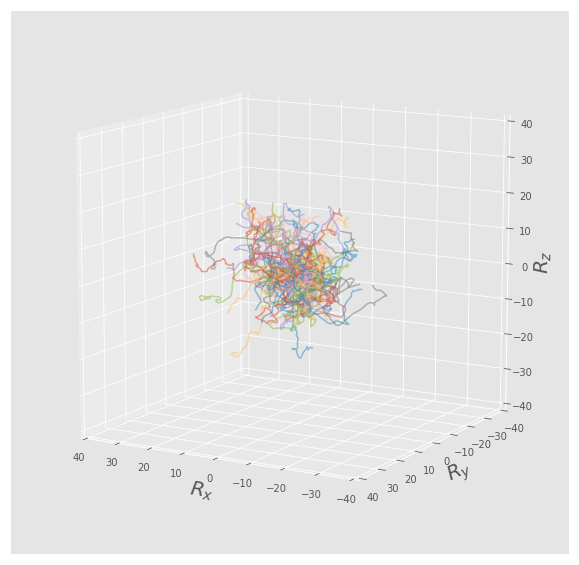

In [14]:
#3D Plot
box = 80
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(-box/2,box/2)
ax.set_ylim(-box/2,box/2)
ax.set_zlim(-box/2,box/2)
ax.set_xlabel(r"$R_x$", fontsize=20)
ax.set_ylabel(r"$R_y$", fontsize=20)
ax.set_zlabel(r"$R_z$", fontsize=20)
ax.view_init(elev=12,azim=120)
for n in range(nump):
    ax.plot(Rs[0,n,0:nums],Rs[1,n,0:nums],Rs[2,n,0:nums],alpha=0.5)
plt.show()

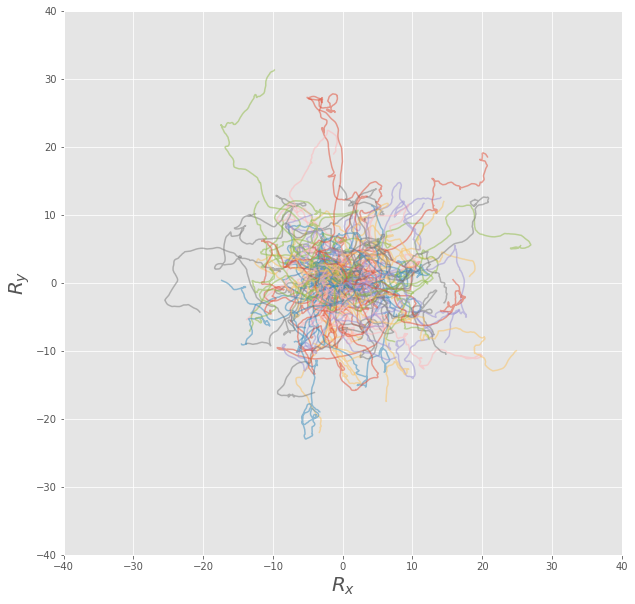

In [15]:
#2D Plot
box = 80
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel(r"$R_x$", fontsize=20)
ax.set_ylabel(r"$R_y$", fontsize=20)
plt.xlim(-box/2,box/2)
plt.ylim(-box/2,box/2)
for n in range(nump):
    ax.plot(Rs[0,n,0:nums],Rs[1,n,0:nums],alpha=0.5)
plt.show()